In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [2]:

df = pd.read_csv('athlete_events.csv')



Sex    F      M  Female_Percentage
Year                              
1896 NaN  380.0                NaN

Sex        F       M  Female_Percentage
Year                                   
2016  6223.0  7465.0          45.463179


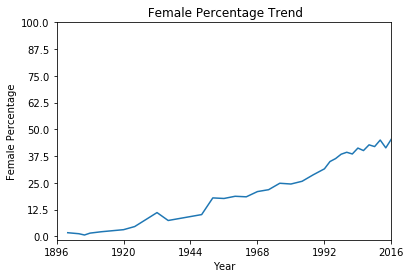

In [3]:


df_sex = df.groupby(['Year','Sex'],sort = True)['Name'].count().unstack()
df_sex['Female_Percentage'] = df_sex['F']/(df_sex['F'] + df_sex['M'])* 100

print(df_sex.head(1))
print()
print(df_sex.tail(1))

df_sex['Female_Percentage'].plot()
plt.xlabel('Year')                 
plt.ylabel('Female Percentage')    
plt.xticks(np.linspace(1896,2016,6)) 
plt.yticks(np.linspace(0,100,9))
plt.title(' Female Percentage Trend')             
plt.show()

In [4]:

print("BMI Formula: BMI = weight /  Height^2 ")
print("                      (kg) / (m^2)")




BMI Formula: BMI = weight /  Height^2 
                      (kg) / (m^2)


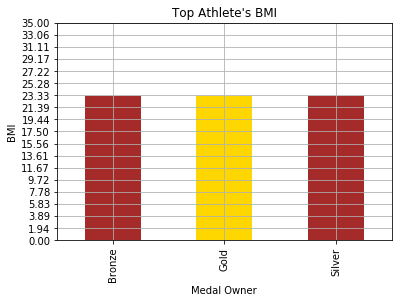

In [29]:

df_BMI_age_medal = df.loc[0:,['Medal','Age','Height','Weight']]
df_BMI_age_medal['Height in m'] = df_BMI_age_medal['Height']/100
df_BMI_age_medal['BMI'] = df_BMI_age_medal['Weight'] / (df_BMI_age_medal['Height']*df_BMI_age_medal['Height in m'])*100
df_BMI_age_medal.groupby('Medal')['BMI'].mean().plot(kind='bar',color = ('brown','gold') )
plt.xlabel('Medal Owner')      
plt.ylabel('BMI')  
plt.yticks(np.linspace(0,35,19))  
plt.title("Top Athlete's BMI")  
plt.grid(True)           
plt.show()

In [6]:

df_BMI_age_medal.groupby('Medal')['BMI'].mean()



Medal
Bronze    23.158899
Gold      23.184077
Silver    23.149488
Name: BMI, dtype: float64

In [30]:


df_BMI = df_BMI_age_medal.loc[0:,['BMI']]
df_BMI




,BMI
0,24.691358
1,20.761246
2,NaN
3,NaN
4,23.959094
5,23.959094
6,23.959094
7,23.959094
8,23.959094
9,23.959094


In [31]:

df_BMI



,BMI
0,24.691358
1,20.761246
2,NaN
3,NaN
4,23.959094
5,23.959094
6,23.959094
7,23.959094
8,23.959094
9,23.959094


In [ ]:

df_try = pd.DataFrame(columns=['underweight', 'healthy_weight', 'overweight', 'obese'])

df_try['underweight'] = [0,1]

df_try

In [32]:
underweight = df_BMI[df_BMI['BMI'] < 18.5].count()
healthy_weight = df_BMI[df_BMI['BMI'] <= 24.9].count() - underweight
overweight = df_BMI[df_BMI['BMI'] <= 29.9].count() - healthy_weight - underweight
obese = df_BMI.count()- overweight - healthy_weight - underweight

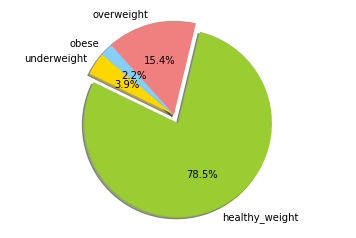

In [33]:
# Data to plot
labels = 'underweight','healthy_weight','overweight','obese'
sizes = [underweight.BMI,healthy_weight.BMI,overweight.BMI,obese.BMI]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()